# ОПИСАНИЕ ПРОЕКТА
***
Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши.  
Задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.
Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.  

Вам предстоит изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.
Выручка измеряется в условных единицах — у.е.
***

<b><font size=5>Содержание</font></b><a name="to_content."></a>

[**1. Получение и подготовка данных**](#1.)  
    [1.1. Сохранение данных в переменные*](#1.1.)  
    [1.2. Подготовка данных](#1.2.)  
    
[**2. Расчёт метрик и построение графиков**](#2.)  
    [2.1. Продуктовые метрики](#2.1.)  
    [2.2. Метрики электронной коммерции](#2.2.)  
    [2.3. Маркетинговые метрики](#2.3.)  
    
[**3. Выводы и рекомендации**](#3.)  

---

# ВЫПОЛНЕНИЕ ПРОЕКТА
***

## Шаг 1. Получение и подготовка данных<a name="1.">

### 1.1. Сохранение данных в переменные<a name="1.1.">
[<font size="2">(к содержанию)</font>](#to_content.)

Импортируем библиотеку **pandas**, и заодно все остальные, которые нам пригодятся, и прочитаем файл. Выведем таблицу и основную информацию о ней.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')

display(visits)
print(visits.info())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


Аналогичным образом поступим и с другими файлами.

In [3]:
orders = pd.read_csv('/datasets/orders_log.csv')

display(orders)
print(orders.info())

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [4]:
costs = pd.read_csv('/datasets/costs.csv')

display(costs)
print(costs.info())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


#### Замеченные недостатки в данных, от которых нужно избавиться:
- названия столбцов в **orders** и **visits** начинаются с заглавных букв;
- столбцы `end_ts` и `start_ts` в таблице **visits**,столбец `dt` в таблице **costs**, а так же столбец `buy_ts` в таблице **orders** записаны как строки, а не как даты;

Исправим это.  

### 1.2. Подготовка данных. Приведение значений в соответствие типам<a name="1.2.">
[<font size="2">(к содержанию)</font>](#to_content.)

Сначала заменим названия столбцов.

In [5]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']

Теперь приведём к нужному формату даты в таблицах **visits** и **orders**, затем выведем эти столцы и информацию о таблицах, чтобы убедиться, что всё прошло нормально.

In [6]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')
print(orders['buy_ts'])
print(visits['end_ts'])
print(visits['start_ts'])
print(visits.info())
print(orders.info())

0       2017-06-01 00:10:00
1       2017-06-01 00:25:00
2       2017-06-01 00:27:00
3       2017-06-01 00:29:00
4       2017-06-01 07:58:00
                ...        
50410   2018-05-31 23:50:00
50411   2018-05-31 23:50:00
50412   2018-05-31 23:54:00
50413   2018-05-31 23:56:00
50414   2018-06-01 00:02:00
Name: buy_ts, Length: 50415, dtype: datetime64[ns]
0        2017-12-20 17:38:00
1        2018-02-19 17:21:00
2        2017-07-01 01:54:00
3        2018-05-20 11:23:00
4        2017-12-27 14:06:00
                 ...        
359395   2017-07-29 19:07:19
359396   2018-01-25 17:38:19
359397   2018-03-03 10:12:19
359398   2017-11-02 10:12:19
359399   2017-09-10 13:13:19
Name: end_ts, Length: 359400, dtype: datetime64[ns]
0        2017-12-20 17:20:00
1        2018-02-19 16:53:00
2        2017-07-01 01:54:00
3        2018-05-20 10:59:00
4        2017-12-27 14:06:00
                 ...        
359395   2017-07-29 19:07:00
359396   2018-01-25 17:38:00
359397   2018-03-03 10:12:00
359398   

Отлично. Сделаем то же самое для таблицы **costs**.

In [7]:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')
print(costs['dt'])
print(costs.info())

0      2017-06-01
1      2017-06-02
2      2017-06-03
3      2017-06-04
4      2017-06-05
          ...    
2537   2018-05-27
2538   2018-05-28
2539   2018-05-29
2540   2018-05-30
2541   2018-05-31
Name: dt, Length: 2542, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


На всякий случай проверим таблицы на наличие дубликатов.

In [8]:
print(costs.duplicated().sum())
print(orders.duplicated().sum())
print(visits.duplicated().sum())

0
0
0


И отрицательных сумм расходов на маркетинг или заказов пользователей.

In [9]:
print(len(costs[costs['costs'] < 0]))
print(len(orders[orders['revenue'] < 0]))

0
0


И ошибки в данных сессий. Когда с сайта вышли раньше чем зашли на него.

In [10]:
visits['duration'] = visits['end_ts'] - visits['start_ts']
visits['duration'] = visits['duration'].astype('timedelta64[s]')
print(len(visits[visits['duration'] < 0]))

2


2 нашлись. Взглянем на них получше.

In [11]:
display(visits[visits['duration'] < 0])

,device,end_ts,source_id,start_ts,uid,duration
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,-1920.0
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,-2760.0


Ошибка в данных. Какая гадать не буду, удалим 2 строки. В таким большом наборе данных на результатах исследования это не отразится.

In [12]:
visits = visits.drop([4181, 177972])
visits.reset_index(drop=True, inplace=True)
print(len(visits[visits['duration'] < 0]))
print(visits.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359398 entries, 0 to 359397
Data columns (total 6 columns):
device       359398 non-null object
end_ts       359398 non-null datetime64[ns]
source_id    359398 non-null int64
start_ts     359398 non-null datetime64[ns]
uid          359398 non-null uint64
duration     359398 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(1), object(1), uint64(1)
memory usage: 16.5+ MB
None


## Шаг 2. Рассчитайте метрики и постройте графики.<a name="2.">

### 2.1. Продуктовые метрики<a name="2.1.">
[<font size="2">(к содержанию)</font>](#to_content.)

Для расчёта метрик **DAU**, **MAU** и **WAU**, извлечём из времени и даты начала сессии:
- дату;
- номер недели;
- месяц;
- год.

Затем, выведем таблицу для прверки корректности рассчитанных данных.

In [13]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
display(visits)

,device,end_ts,source_id,start_ts,uid,duration,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680.0,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.0,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440.0,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.0,2017,12,52,2017-12-27
...,...,...,...,...,...,...,...,...,...,...
359393,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,19.0,2017,7,30,2017-07-29
359394,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,19.0,2018,1,4,2018-01-25
359395,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,19.0,2018,3,9,2018-03-03
359396,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,19.0,2017,11,44,2017-11-02


Теперь посчитаем количество уникальных пользователей за каждый день - **DAU**. Для этого сгруппируем данные по датам сессий и посчитаем количество уникальных пользователей за каждый день, так же узнаем сколько вообще бывает посещений на сайте каждый день. Выведем таблицу на экран, чтобы ознакомиться с результатом.

In [14]:
dau = visits.groupby('session_date', as_index=False).agg({'uid':'nunique', 'start_ts':'count'})
display(dau)

,session_date,uid,start_ts
0,2017-06-01,605,664
1,2017-06-02,608,658
2,2017-06-03,445,477
3,2017-06-04,476,510
4,2017-06-05,820,893
...,...,...,...
359,2018-05-27,620,672
360,2018-05-28,1039,1156
361,2018-05-29,948,1035
362,2018-05-30,1289,1410


Всё плучилось, но столбцы надо переименовать.

In [15]:
dau.rename(columns={'uid':'users', 'start_ts':'visits'}, inplace=True)
dau['sessions_per_user'] = dau['visits'] / dau ['users']

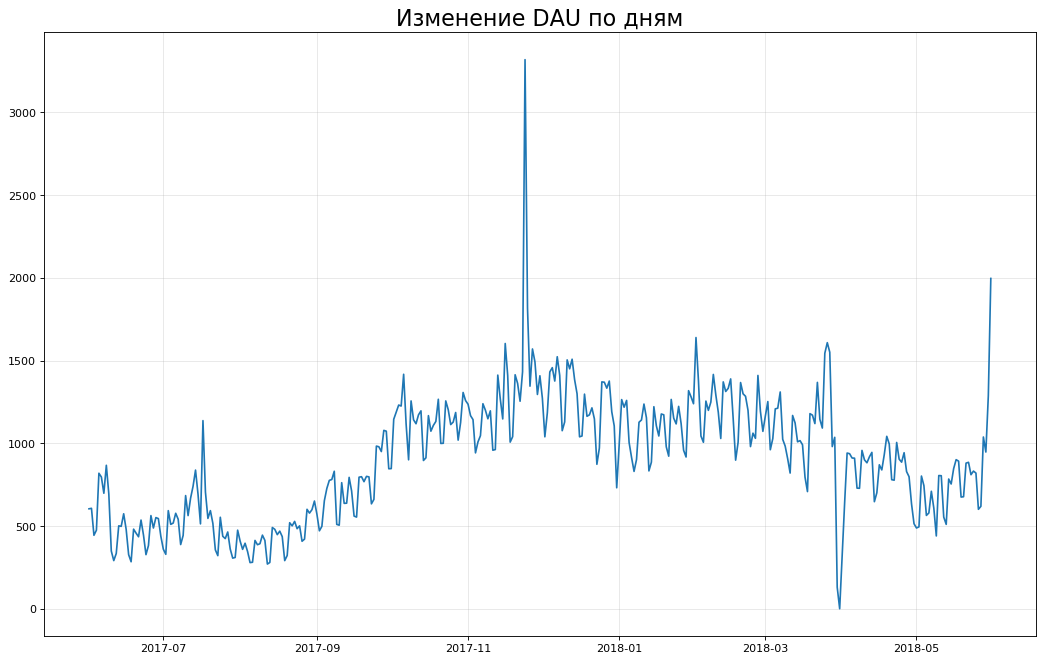

count     364.000000
mean      907.991758
std       370.513838
min         1.000000
25%       594.000000
50%       921.000000
75%      1173.000000
max      3319.000000
Name: users, dtype: float64

В среднем сессий на одного пользователя 1.0821660876897365


In [16]:
register_matplotlib_converters()
plt.figure(figsize=(16, 10), dpi=80)
plt.plot('session_date', 'users', data=dau)
plt.grid(axis='both', alpha=.3)
plt.title('Изменение DAU по дням', fontsize=20)
plt.show()
print(dau['users'].describe())
print()
print('В среднем сессий на одного пользователя', dau['sessions_per_user'].mean())

В целом показатель рос с августа по декабрь, затем плавно снижался. Максимальное значение - 3319 пользователей в ноябре 2017 (на пике роста), минимальное значение - 1 пользователь, примерно в апреле 2018 (в период медленного спада). На одного пользователя в среднем 1.082 сессии, то есть почти никто не заходил повторно.

Проверим это на графике посещений сайта по дням.

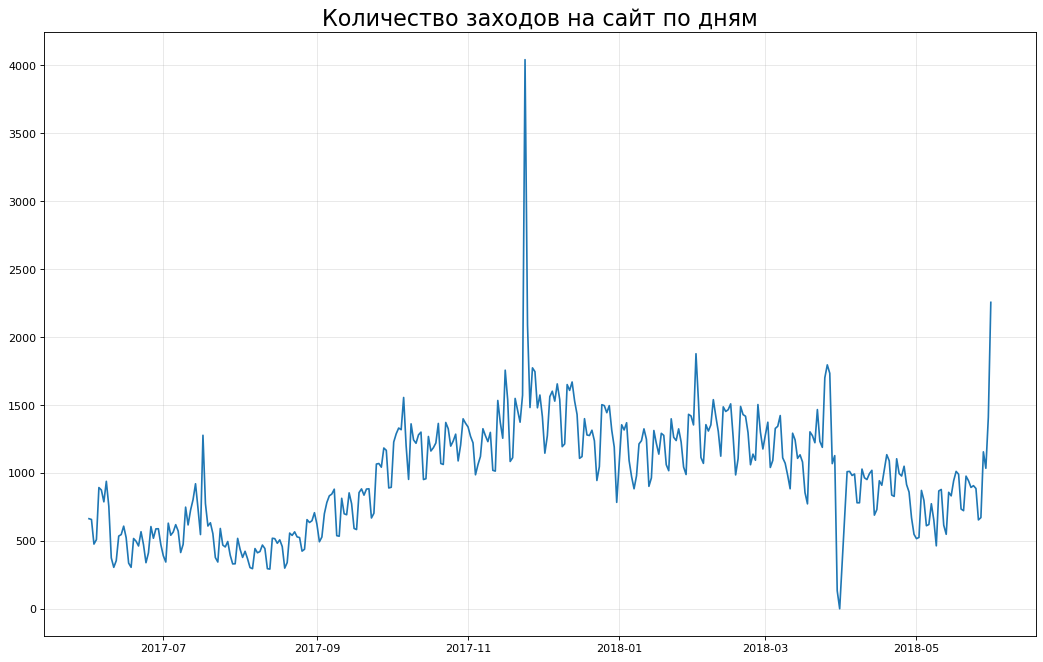

count     364.000000
mean      987.357143
std       418.985399
min         1.000000
25%       635.500000
50%      1003.000000
75%      1280.000000
max      4042.000000
Name: visits, dtype: float64


In [17]:
plt.figure(figsize=(16, 10), dpi=80)
plt.plot('session_date', 'visits', data=dau)
plt.grid(axis='both', alpha=.3)
plt.title('Количество заходов на сайт по дням', fontsize=20)
plt.show()
print(dau['visits'].describe())

Так и есть. График и значения почти совпадают с **DAU**. Не вижу необходимости отслеживать эту метрику в дальнейшем.

Теперь, аналогичным образом получим показатель **WAU** - число уникальных пользователей за неделю. Для этого сгруппируем данные по году и неделе, чтобы избежать путаницы.

In [18]:
wau = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique', 'start_ts':'count'})
display(wau.head())

uid  start_ts
session_year session_week                
2017         22            2021      2309
             23            4129      4931
             24            2812      3214
             25            2878      3273
             26            3064      3514

Переименуем столбцы и построим график.

In [19]:
wau.rename(columns={'uid':'users', 'start_ts':'visits'}, inplace=True)
wau['sessions_per_user'] = wau['visits'] / wau ['users']

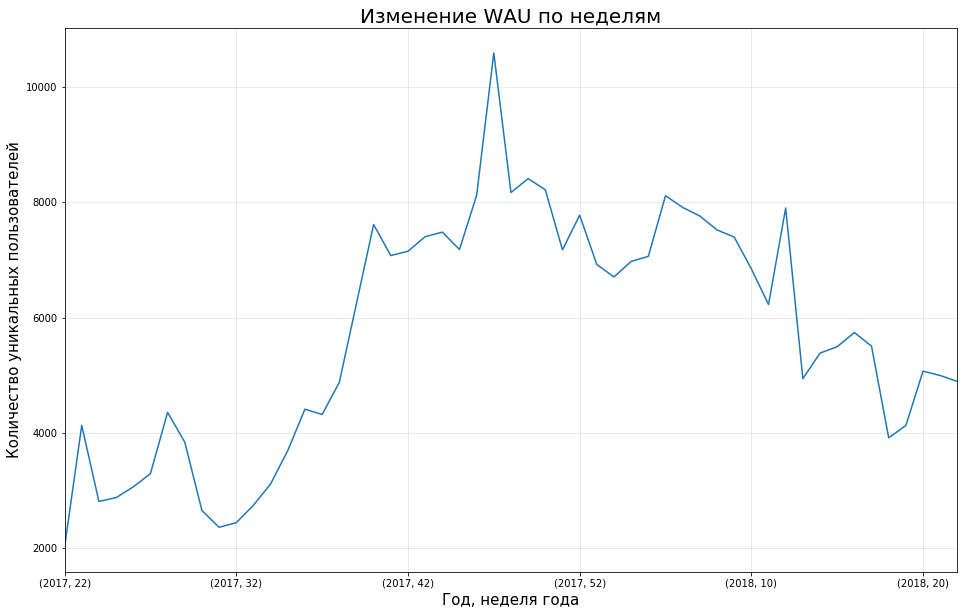

count       53.000000
mean      5716.245283
std       2049.898027
min       2021.000000
25%       4128.000000
50%       5740.000000
75%       7401.000000
max      10586.000000
Name: users, dtype: float64
В среднем сессий на одного пользователя 1.1790204042200612


In [20]:
wau.drop(columns=['visits', 'sessions_per_user']).plot(figsize=(16, 10), legend=False)
plt.grid(axis='both', alpha=.3)
plt.xlabel('Год, неделя года', fontsize=15)
plt.ylabel('Количество уникальных пользователей', fontsize=15)
plt.title('Изменение WAU по неделям', fontsize=20)
plt.show()
print(wau['users'].describe())
print('В среднем сессий на одного пользователя', wau['sessions_per_user'].mean())

Похожая ситуация и здесь. Быстрый рост, затем пик (10'586 пользователей за неделю). Однако спад на этом графике более выражен. По неделям количество сессий на пользователя немного возросло - уже 1.179. Возмоно в течение недели кто-то возвращался.

Расчёт **MAU** таким же образом.

In [21]:
mau = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique', 'start_ts':'count'})
display(mau)

uid  start_ts
session_year session_month                 
2017         6              13259     16505
             7              14183     17828
             8              11631     14355
             9              18975     23907
             10             29692     37903
             11             32797     43969
             12             31557     41983
2018         1              28716     36939
             2              28749     37182
             3              27473     35677
             4              21008     26515
             5              20701     26635

Переименуем столбцы. Для построения графика сохраним индексы в отдельной колонке. Они будут выполнять роль порядкового номера месяца в нашем наблюдении.

In [22]:
mau.rename(columns={'uid':'users', 'start_ts':'visits'}, inplace=True)
mau['sessions_per_user'] = mau['visits'] / mau ['users']

Построим график.

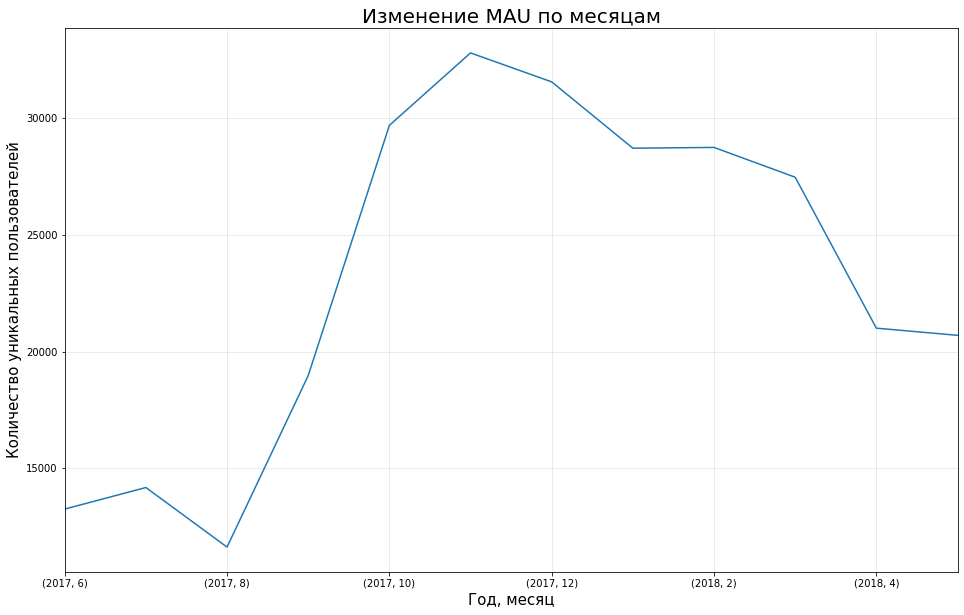

count       12.000000
mean     23228.416667
std       7546.380462
min      11631.000000
25%      17777.000000
50%      24240.500000
75%      28984.750000
max      32797.000000
Name: users, dtype: float64
В среднем сессий на одного пользователя 1.280883428036945


In [23]:
mau.drop(columns=['visits', 'sessions_per_user']).plot(figsize=(16, 10), legend=False)
plt.grid(axis='both', alpha=.3)
plt.xlabel('Год, месяц', fontsize=15)
plt.ylabel('Количество уникальных пользователей', fontsize=15)
plt.title('Изменение MAU по месяцам', fontsize=20)
plt.show()
print(mau['users'].describe())
print('В среднем сессий на одного пользователя', mau['sessions_per_user'].mean())

Со второго месяца по четвёртый (с августа по октябрь) - стремительный рост. Затем плавный спад начиная с 5-го месяца (с ноября). С 9 по 10 (с марта по апрель) более резкое падение. Пик пришёлся на 5-ый месяц (ноябрь) - 32'797. Количество сессий на пользователя так же выросло - 1.28 на пользователя. То есть ползователи возвращаются, но не сразу.


Теперь ответим на несколько вопросов.

In [24]:
print('Среднее количество посещений сайта в день', int(dau['visits'].mean()))
print('Среднее количество уникальных пользователей в день (DAU)', int(dau['users'].mean()))
print('Среднее количество уникальных пользователей в неделю (WAU)', int(wau['users'].mean()))
print('Среднее количество уникальных пользователей в месяц (MAU)', int(mau['users'].mean()))

Среднее количество посещений сайта в день 987
Среднее количество уникальных пользователей в день (DAU) 907
Среднее количество уникальных пользователей в неделю (WAU) 5716
Среднее количество уникальных пользователей в месяц (MAU) 23228


Идём дальше.

Теперь построим график для наглядности распределения продолжительности пользовательских сессий.  Построим гистограмму со множеством корзин, так как значений очень много.

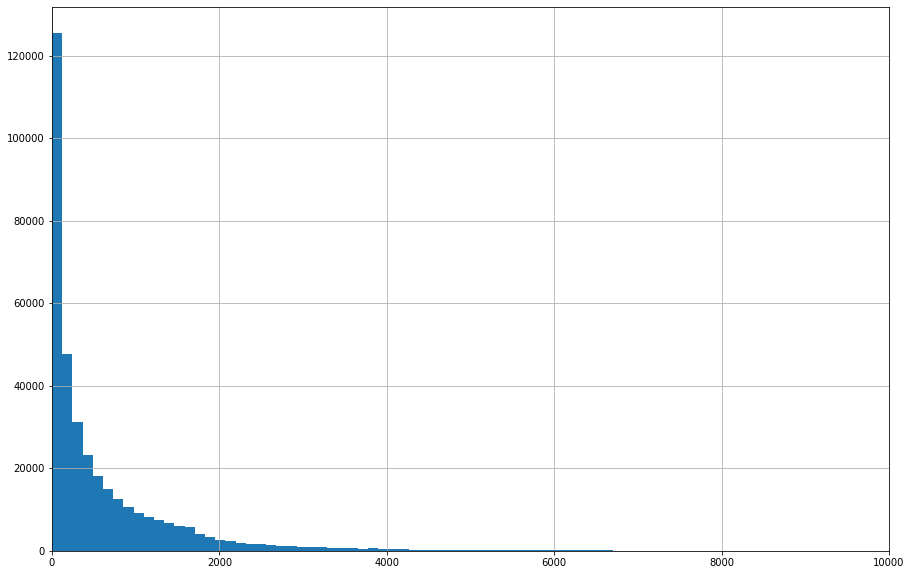

In [25]:
visits['duration'].hist(figsize=(15, 10), bins=350)
plt.xlim(0, 10000)
plt.show()

Распределение не близко к нормальному, большая часть сессий очень короткие, поэтому вместе среднего и медианы, опираемся на моду. Узнаем её значение.

In [26]:
print(visits['duration'].mode())

0    60.0
dtype: float64


Посчитаем сессию в минутах.

In [27]:
print('Обычная продолжительность пользовательской сессии', visits['duration'].mode().sum() / 60, 'мин.')

Обычная продолжительность пользовательской сессии 1.0 мин.


Теперь создадим когорты - по дате первого визита на сайт. Для этого сгруппируем данные по `uid` пользователей и найдём время их первого захода на сайт.

In [28]:
first_activity_date = visits.groupby('uid')['session_date'].min().reset_index()

Объединим таблицы по полю `uid`, чтобы у каждого пользователя была дата первого посещения сайта.

In [29]:
visits = visits.merge(first_activity_date, on='uid')
display(visits)

,device,end_ts,source_id,start_ts,uid,duration,session_year,session_month,session_week,session_date_x,session_date_y
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0,2017,12,51,2017-12-20,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680.0,2018,2,8,2018-02-19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.0,2017,7,26,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440.0,2018,5,20,2018-05-20,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,1680.0,2018,3,10,2018-03-09,2018-03-09
...,...,...,...,...,...,...,...,...,...,...,...
359393,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,480.0,2018,4,17,2018-04-23,2018-04-23
359394,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,0.0,2017,11,45,2017-11-08,2017-11-08
359395,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,1080.0,2017,7,31,2017-07-31,2017-07-31
359396,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,840.0,2018,3,12,2018-03-20,2018-03-20


Переименуем столбцы.

In [30]:
visits.rename(columns={'session_date_x':'session_date', 'session_date_y':'first_activity_date'}, inplace=True)
display(visits)

,device,end_ts,source_id,start_ts,uid,duration,session_year,session_month,session_week,session_date,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0,2017,12,51,2017-12-20,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680.0,2018,2,8,2018-02-19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.0,2017,7,26,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440.0,2018,5,20,2018-05-20,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,1680.0,2018,3,10,2018-03-09,2018-03-09
...,...,...,...,...,...,...,...,...,...,...,...
359393,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,480.0,2018,4,17,2018-04-23,2018-04-23
359394,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,0.0,2017,11,45,2017-11-08,2017-11-08
359395,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,1080.0,2017,7,31,2017-07-31,2017-07-31
359396,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,840.0,2018,3,12,2018-03-20,2018-03-20


Выделим из даты первого захода на сайт, месяц и создадим новый столбец с его значением. Затем, сведём таблицу по месяцу первого захода на сайт, и посчитаем количество уникальных пользователей для каждого месяца.

In [31]:
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
cohort = visits.groupby('first_activity_month', as_index=False).agg({'uid':'nunique'})
display(cohort)

,first_activity_month,uid
0,2017-06-01,13259
1,2017-07-01,13140
2,2017-08-01,10181
3,2017-09-01,16704
4,2017-10-01,25977
5,2017-11-01,27248
6,2017-12-01,25268
7,2018-01-01,22624
8,2018-02-01,22197
9,2018-03-01,20589


Переименуем столбец и объединим таблицы по первому месяцу захода на сайт. Создадим новый столбец, содержащий в себе месяц активности пользователя на сайте, взятый из даты сессии.

In [32]:
cohort.rename(columns={'uid':'cohort_users'}, inplace=True)
visits = visits.merge(cohort, on='first_activity_month')
visits['activity_month'] = visits['session_date'].astype('datetime64[M]')
display(visits)

,device,end_ts,source_id,start_ts,uid,duration,session_year,session_month,session_week,session_date,first_activity_date,first_activity_month,cohort_users,activity_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0,2017,12,51,2017-12-20,2017-12-20,2017-12-01,25268,2017-12-01
1,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.0,2017,12,52,2017-12-27,2017-12-27,2017-12-01,25268,2017-12-01
2,touch,2017-12-26 17:35:00,4,2017-12-26 17:30:00,11451610027598174149,300.0,2017,12,52,2017-12-26,2017-12-26,2017-12-01,25268,2017-12-01
3,desktop,2018-01-08 18:55:00,2,2018-01-08 18:46:00,11451610027598174149,540.0,2018,1,2,2018-01-08,2017-12-26,2017-12-01,25268,2018-01-01
4,desktop,2018-01-07 13:13:00,4,2018-01-07 12:58:00,11451610027598174149,900.0,2018,1,1,2018-01-07,2017-12-26,2017-12-01,25268,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359393,desktop,2017-08-26 22:33:00,3,2017-08-26 22:17:00,7939338551566524976,960.0,2017,8,34,2017-08-26,2017-08-26,2017-08-01,10181,2017-08-01
359394,desktop,2017-08-23 21:54:00,5,2017-08-23 21:43:00,1574381429150211565,660.0,2017,8,34,2017-08-23,2017-08-23,2017-08-01,10181,2017-08-01
359395,desktop,2017-08-22 21:07:00,3,2017-08-22 20:48:00,16741657757032424375,1140.0,2017,8,34,2017-08-22,2017-08-22,2017-08-01,10181,2017-08-01
359396,desktop,2017-08-26 13:47:00,4,2017-08-26 13:46:00,17772445755107552872,60.0,2017,8,34,2017-08-26,2017-08-26,2017-08-01,10181,2017-08-01


Рассчитаем ***lifetime*** когорт. Для этого отнимем от месяца активности месяц первого захода на сайт и разделим на среднее количество дней в месяце. После этого округлим значения в столбце.

In [33]:
visits['cohort_lifetime'] = (visits['activity_month'] - visits['first_activity_month']) / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int64')
display(visits)

,device,end_ts,source_id,start_ts,uid,duration,session_year,session_month,session_week,session_date,first_activity_date,first_activity_month,cohort_users,activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0,2017,12,51,2017-12-20,2017-12-20,2017-12-01,25268,2017-12-01,0
1,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.0,2017,12,52,2017-12-27,2017-12-27,2017-12-01,25268,2017-12-01,0
2,touch,2017-12-26 17:35:00,4,2017-12-26 17:30:00,11451610027598174149,300.0,2017,12,52,2017-12-26,2017-12-26,2017-12-01,25268,2017-12-01,0
3,desktop,2018-01-08 18:55:00,2,2018-01-08 18:46:00,11451610027598174149,540.0,2018,1,2,2018-01-08,2017-12-26,2017-12-01,25268,2018-01-01,1
4,desktop,2018-01-07 13:13:00,4,2018-01-07 12:58:00,11451610027598174149,900.0,2018,1,1,2018-01-07,2017-12-26,2017-12-01,25268,2018-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359393,desktop,2017-08-26 22:33:00,3,2017-08-26 22:17:00,7939338551566524976,960.0,2017,8,34,2017-08-26,2017-08-26,2017-08-01,10181,2017-08-01,0
359394,desktop,2017-08-23 21:54:00,5,2017-08-23 21:43:00,1574381429150211565,660.0,2017,8,34,2017-08-23,2017-08-23,2017-08-01,10181,2017-08-01,0
359395,desktop,2017-08-22 21:07:00,3,2017-08-22 20:48:00,16741657757032424375,1140.0,2017,8,34,2017-08-22,2017-08-22,2017-08-01,10181,2017-08-01,0
359396,desktop,2017-08-26 13:47:00,4,2017-08-26 13:46:00,17772445755107552872,60.0,2017,8,34,2017-08-26,2017-08-26,2017-08-01,10181,2017-08-01,0


Узнаем количество уникальных пользователей в каждом периоде жизни когорт, сгруппировав данные.

In [34]:
users_in_period = visits.groupby(['first_activity_month', 'cohort_lifetime'], as_index=False).agg({'uid':'nunique'})
display(users_in_period)

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


Переименуем столбец и объединим таблицы.

In [35]:
users_in_period.rename(columns={'uid':'users_in_lt'}, inplace=True)
visits = visits.merge(users_in_period, on=['first_activity_month', 'cohort_lifetime'])
display(visits)

,device,end_ts,source_id,start_ts,uid,duration,session_year,session_month,session_week,session_date,first_activity_date,first_activity_month,cohort_users,activity_month,cohort_lifetime,users_in_lt
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0,2017,12,51,2017-12-20,2017-12-20,2017-12-01,25268,2017-12-01,0,25268
1,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.0,2017,12,52,2017-12-27,2017-12-27,2017-12-01,25268,2017-12-01,0,25268
2,touch,2017-12-26 17:35:00,4,2017-12-26 17:30:00,11451610027598174149,300.0,2017,12,52,2017-12-26,2017-12-26,2017-12-01,25268,2017-12-01,0,25268
3,desktop,2017-12-28 15:46:00,4,2017-12-28 15:24:00,63137637277926835,1320.0,2017,12,52,2017-12-28,2017-12-28,2017-12-01,25268,2017-12-01,0,25268
4,desktop,2017-12-03 14:36:00,1,2017-12-03 13:44:00,10945524872043011583,3120.0,2017,12,48,2017-12-03,2017-12-03,2017-12-01,25268,2017-12-01,0,25268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359393,desktop,2018-04-03 21:24:00,3,2018-04-03 21:13:00,11657430150728518228,660.0,2018,4,14,2018-04-03,2017-08-23,2017-08-01,10181,2018-04-01,8,284
359394,desktop,2018-04-22 10:56:00,3,2018-04-22 10:53:00,15167087705879369112,180.0,2018,4,16,2018-04-22,2017-08-21,2017-08-01,10181,2018-04-01,8,284
359395,desktop,2018-04-10 20:36:00,3,2018-04-10 20:34:00,15900830249572167788,120.0,2018,4,15,2018-04-10,2017-08-21,2017-08-01,10181,2018-04-01,8,284
359396,desktop,2018-04-04 13:46:00,2,2018-04-04 13:39:00,16823679688346225686,420.0,2018,4,14,2018-04-04,2017-08-04,2017-08-01,10181,2018-04-01,8,284


Рассчитаем **Retention Rate**, разделим количество пользователей в период жизни когорты на количество её членов и добавим в таблицу новый столбец.

In [36]:
visits['retention'] = visits['users_in_lt'] / visits['cohort_users']
display(visits)

,device,end_ts,source_id,start_ts,uid,duration,session_year,session_month,session_week,session_date,first_activity_date,first_activity_month,cohort_users,activity_month,cohort_lifetime,users_in_lt,retention
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0,2017,12,51,2017-12-20,2017-12-20,2017-12-01,25268,2017-12-01,0,25268,1.000000
1,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.0,2017,12,52,2017-12-27,2017-12-27,2017-12-01,25268,2017-12-01,0,25268,1.000000
2,touch,2017-12-26 17:35:00,4,2017-12-26 17:30:00,11451610027598174149,300.0,2017,12,52,2017-12-26,2017-12-26,2017-12-01,25268,2017-12-01,0,25268,1.000000
3,desktop,2017-12-28 15:46:00,4,2017-12-28 15:24:00,63137637277926835,1320.0,2017,12,52,2017-12-28,2017-12-28,2017-12-01,25268,2017-12-01,0,25268,1.000000
4,desktop,2017-12-03 14:36:00,1,2017-12-03 13:44:00,10945524872043011583,3120.0,2017,12,48,2017-12-03,2017-12-03,2017-12-01,25268,2017-12-01,0,25268,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359393,desktop,2018-04-03 21:24:00,3,2018-04-03 21:13:00,11657430150728518228,660.0,2018,4,14,2018-04-03,2017-08-23,2017-08-01,10181,2018-04-01,8,284,0.027895
359394,desktop,2018-04-22 10:56:00,3,2018-04-22 10:53:00,15167087705879369112,180.0,2018,4,16,2018-04-22,2017-08-21,2017-08-01,10181,2018-04-01,8,284,0.027895
359395,desktop,2018-04-10 20:36:00,3,2018-04-10 20:34:00,15900830249572167788,120.0,2018,4,15,2018-04-10,2017-08-21,2017-08-01,10181,2018-04-01,8,284,0.027895
359396,desktop,2018-04-04 13:46:00,2,2018-04-04 13:39:00,16823679688346225686,420.0,2018,4,14,2018-04-04,2017-08-04,2017-08-01,10181,2018-04-01,8,284,0.027895


Сведём итоговую таблицу по **Retention Rate** по когортам.

In [37]:
retention_pivot = visits.pivot_table(index='first_activity_month', 
                                     columns='cohort_lifetime', 
                                     values='retention')
display(retention_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Так же добавим данные о среднем **Retention rate** среди всех когорт для каждого периода **lifetime**.

In [38]:
retention_pivot.loc['mean'] = retention_pivot.mean()
display(retention_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01 00:00:00,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01 00:00:00,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01 00:00:00,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01 00:00:00,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01 00:00:00,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01 00:00:00,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01 00:00:00,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:00:00,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01 00:00:00,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Составим тепловую карту для большей наглядности.

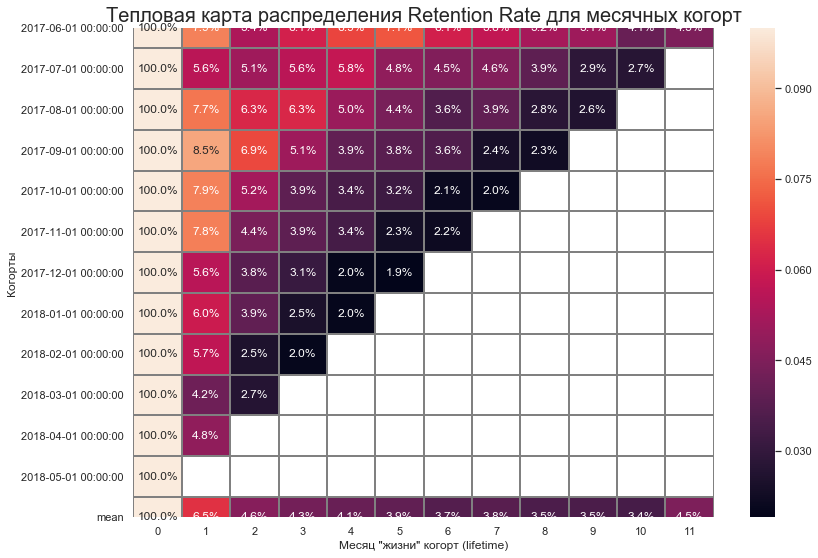

In [39]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Тепловая карта распределения Retention Rate для месячных когорт', fontsize=20)
sns.heatmap(retention_pivot, annot=True, fmt='.1%', vmax=0.1, linewidths=1, linecolor='gray')
plt.xlabel('Месяц "жизни" когорт (lifetime)')
plt.ylabel('Когорты')
plt.show()

Показатель довольно-таки скромен. Лучше всех себя показали "летние" когорты (июнь-август), осоенно июньская - даже спустя год её **Retention Rate** выше чем у других когорт на 3-4 месяц их жизни.

Однако, ответим на поставленный вопрос.

In [40]:
print('Средний Retention Rate на второй месяц жизни когорт равен {:.2%}'.format(retention_pivot[2].mean()))

Средний Retention Rate на второй месяц жизни когорт равен 4.63%


Cовсем не впечатляющая цифра.

### 2.2. Метрики электронной коммерции<a name="2.2.">
[<font size="2">(к содержанию)</font>](#to_content.)

Ещё раз ознакомимся с таблицами **visits** и **orders**.

In [41]:
display(visits)

,device,end_ts,source_id,start_ts,uid,duration,session_year,session_month,session_week,session_date,first_activity_date,first_activity_month,cohort_users,activity_month,cohort_lifetime,users_in_lt,retention
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0,2017,12,51,2017-12-20,2017-12-20,2017-12-01,25268,2017-12-01,0,25268,1.000000
1,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.0,2017,12,52,2017-12-27,2017-12-27,2017-12-01,25268,2017-12-01,0,25268,1.000000
2,touch,2017-12-26 17:35:00,4,2017-12-26 17:30:00,11451610027598174149,300.0,2017,12,52,2017-12-26,2017-12-26,2017-12-01,25268,2017-12-01,0,25268,1.000000
3,desktop,2017-12-28 15:46:00,4,2017-12-28 15:24:00,63137637277926835,1320.0,2017,12,52,2017-12-28,2017-12-28,2017-12-01,25268,2017-12-01,0,25268,1.000000
4,desktop,2017-12-03 14:36:00,1,2017-12-03 13:44:00,10945524872043011583,3120.0,2017,12,48,2017-12-03,2017-12-03,2017-12-01,25268,2017-12-01,0,25268,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359393,desktop,2018-04-03 21:24:00,3,2018-04-03 21:13:00,11657430150728518228,660.0,2018,4,14,2018-04-03,2017-08-23,2017-08-01,10181,2018-04-01,8,284,0.027895
359394,desktop,2018-04-22 10:56:00,3,2018-04-22 10:53:00,15167087705879369112,180.0,2018,4,16,2018-04-22,2017-08-21,2017-08-01,10181,2018-04-01,8,284,0.027895
359395,desktop,2018-04-10 20:36:00,3,2018-04-10 20:34:00,15900830249572167788,120.0,2018,4,15,2018-04-10,2017-08-21,2017-08-01,10181,2018-04-01,8,284,0.027895
359396,desktop,2018-04-04 13:46:00,2,2018-04-04 13:39:00,16823679688346225686,420.0,2018,4,14,2018-04-04,2017-08-04,2017-08-01,10181,2018-04-01,8,284,0.027895


In [42]:
display(orders)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


Для каждого пользователя найдём дату и время первой покупки и сохраним в отдельный датафрейм.

In [43]:
first_order = orders.groupby('uid', as_index=False).agg({'buy_ts':'min'})
display(first_order)

,uid,buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


Переименуем столбец.

In [44]:
first_order.rename(columns={'buy_ts':'first_order'}, inplace=True)

Аналогично найдём первую сессию для каждого пользователя.

In [45]:
first_sess = visits.groupby('uid', as_index=False).agg({'start_ts':'min'})
display(first_sess)

,uid,start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


Переименуем столбец.

In [46]:
first_sess.rename(columns={'start_ts':'first_session'}, inplace=True)

Объединим таблицы.

In [47]:
first_session_and_order = first_sess.merge(first_order, on='uid', how='left')
display(first_session_and_order)

,uid,first_session,first_order
0,11863502262781,2018-03-01 17:27:00,NaT
1,49537067089222,2018-02-06 15:55:00,NaT
2,297729379853735,2017-06-07 18:47:00,NaT
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
4,325320750514679,2017-09-30 14:29:00,NaT
...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,NaT
228165,18446424184725333426,2017-12-06 20:32:00,NaT
228166,18446556406699109058,2018-01-01 16:29:00,NaT
228167,18446621818809592527,2017-12-27 13:27:00,NaT


Высчитаем разницу между датой и временем первого заказа и первого захода на сайт.

In [48]:
first_session_and_order['time_to_order'] = first_session_and_order['first_order'] - first_session_and_order['first_session']
first_session_and_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228169 entries, 0 to 228168
Data columns (total 4 columns):
uid              228169 non-null uint64
first_session    228169 non-null datetime64[ns]
first_order      36523 non-null datetime64[ns]
time_to_order    36523 non-null timedelta64[ns]
dtypes: datetime64[ns](2), timedelta64[ns](1), uint64(1)
memory usage: 8.7 MB


Извлечем из получившегося нового столбца количество секунд и запишем в отдельный столбец.

In [49]:
first_session_and_order['seconds_to_order'] = first_session_and_order['time_to_order'].astype('timedelta64[s]')
display(first_session_and_order)

,uid,first_session,first_order,time_to_order,seconds_to_order
0,11863502262781,2018-03-01 17:27:00,NaT,NaT,NaN
1,49537067089222,2018-02-06 15:55:00,NaT,NaT,NaN
2,297729379853735,2017-06-07 18:47:00,NaT,NaT,NaN
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00,9241320.0
4,325320750514679,2017-09-30 14:29:00,NaT,NaT,NaN
...,...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,NaT,NaT,NaN
228165,18446424184725333426,2017-12-06 20:32:00,NaT,NaT,NaN
228166,18446556406699109058,2018-01-01 16:29:00,NaT,NaT,NaN
228167,18446621818809592527,2017-12-27 13:27:00,NaT,NaT,NaN


Взгляем на распределение получившегося значения.

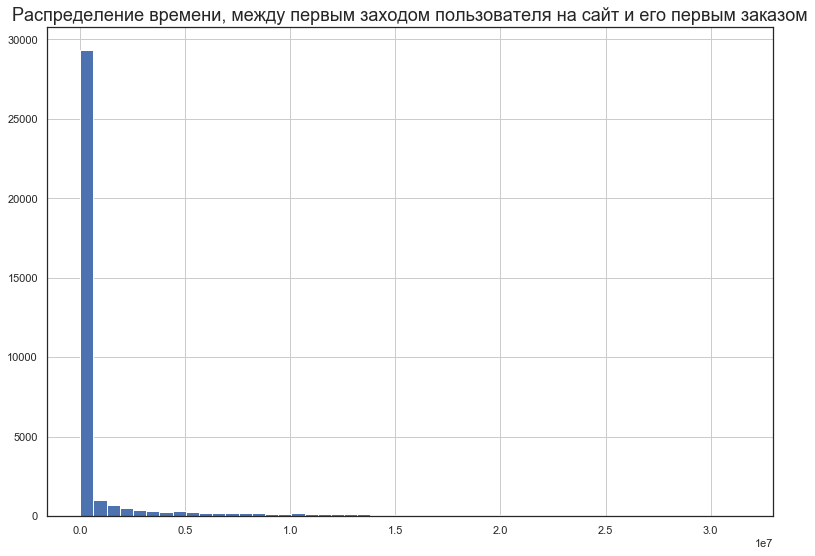

In [50]:
first_session_and_order['seconds_to_order'].hist(figsize=(13, 9), bins=50)
plt.title('Распределение времени, между первым заходом пользователя на сайт и его первым заказом', fontsize=18)
plt.show()

Возможно ошибка в данных - пользователь впервые зашёл на сайт и в ту же секунду купил что-то? Или, возможно, пользователь был пернаправлен для заказа с другого сайта, и момент оплаты и стал для него первым заходом. Проверим таких.

In [51]:
print(len(first_session_and_order[first_session_and_order['seconds_to_order'] == 0]))

2455


Почти 2'500 значений. Но судя по значениям горизонтальной оси, в столбце много больших цифр. Слишком больших для измерения в секундах. Всё-таки, я считаю, что в этой ситуации больше подходят секунды. Однако, узнаем моду, среднее не подойдёт при таком распределении.

In [52]:
first_session_and_order['seconds_to_order'].mode()

0    60.0
dtype: float64

Итого, получаем **1 минуту**.

Теперь взглянем ещё раз на таблицу заказов.

In [53]:
display(orders)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


Извлечём месяц из даты покупки и сохраним его в отдельный столбец.

In [54]:
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')
display(orders)

,buy_ts,revenue,uid,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01


Сведём данные в сводную таблицу, посчитаем количество покупок и количество уникальных пользователей за месяц.

In [55]:
buyers = orders.pivot_table(index='buy_month', 
                            values=['buy_ts', 'uid'], 
                            aggfunc={'buy_ts':'count', 'uid':'nunique'}).reset_index()
display(buyers)

,buy_month,buy_ts,uid
0,2017-06-01,2354,2023
1,2017-07-01,2363,1984
2,2017-08-01,1807,1472
3,2017-09-01,3387,2750
4,2017-10-01,5679,4675
5,2017-11-01,5659,4547
6,2017-12-01,6218,4942
7,2018-01-01,4721,3898
8,2018-02-01,5281,4258
9,2018-03-01,5326,4181


Переименуем столбцы.

In [56]:
buyers.rename(columns={'buy_ts':'count_buy', 'uid':'uniq_buyers'}, inplace=True)

Чтобы получить данные за 6 месяцев, отберём первые 6 строк.

In [57]:
buyers = buyers.loc[0:5, 'count_buy':'uniq_buyers']
display(buyers)

,count_buy,uniq_buyers
0,2354,2023
1,2363,1984
2,1807,1472
3,3387,2750
4,5679,4675
5,5659,4547


Посчитаем данные нарастающим итогом, затем, добавим столбец с данными о количестве заказов на одного пользователя. Выведем последнюю строку таблицы, содержащую все сведения за полгода.

In [58]:
buyers = buyers.cumsum()
buyers['orders_on_buyer'] = buyers['count_buy'] / buyers['uniq_buyers']
display(buyers.loc[5])

count_buy          21249.000000
uniq_buyers        17451.000000
orders_on_buyer        1.217638
Name: 5, dtype: float64

Среднее количество покупок на одного покупателя за 6 месяцев **1.22**.

Теперь, сгруппируем таблицу заказов по месяцам и узнаем средний доход за день.

In [59]:
day_mean_buy = orders.groupby('buy_month', as_index=False).agg({'revenue':'mean'})
display(day_mean_buy)

,buy_month,revenue
0,2017-06-01,4.060106
1,2017-07-01,5.306589
2,2017-08-01,4.847139
3,2017-09-01,5.416448
4,2017-10-01,4.928280
5,2017-11-01,4.783518
6,2017-12-01,5.852139
7,2018-01-01,4.112927
8,2018-02-01,4.840095
9,2018-03-01,5.413930


Посмотрим на графике как менялся средний чек с течением времени.

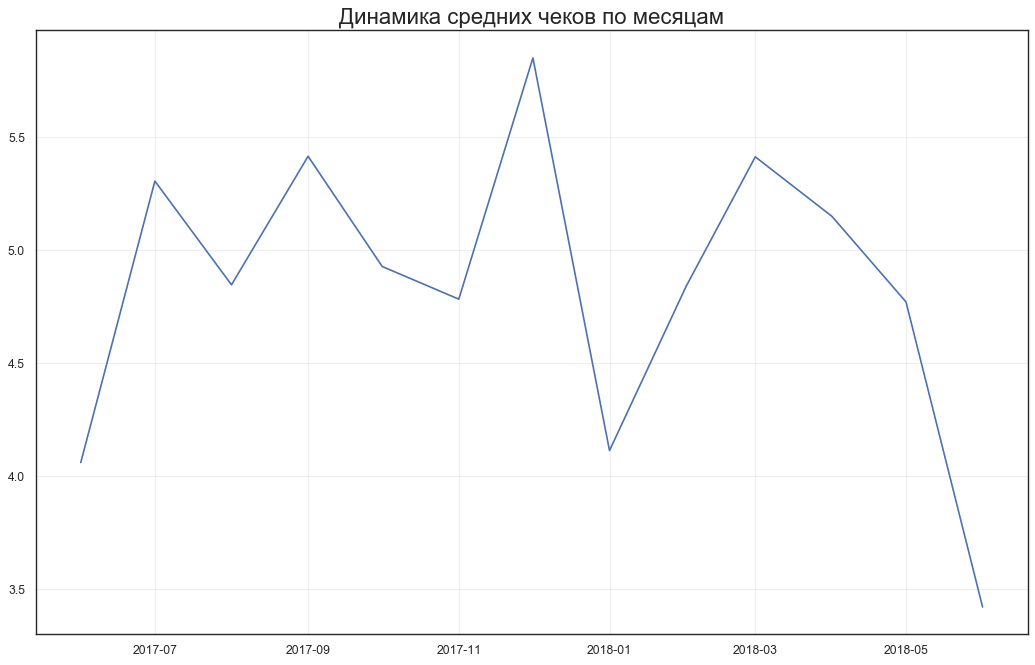

count    13.000000
mean      4.838700
std       0.656336
min       3.420000
25%       4.771279
50%       4.847139
75%       5.306589
max       5.852139
Name: revenue, dtype: float64


In [60]:
plt.figure(figsize=(16, 10), dpi=80)
plt.plot('buy_month', 'revenue', data=day_mean_buy)
plt.grid(axis='both', alpha=.3)
plt.title('Динамика средних чеков по месяцам', fontsize=20)
plt.show()
print(day_mean_buy['revenue'].describe())

Наглядно видны изменения исследуемого значения. Самый высокое значение в декабре, а в январе сильный спад. Скорее всего, дело в новогодних праздниках. Поле марта показатель стабильно снижается. Наверное, с долгожданным потеплением люди идут гулять на улицы, предпочитая их походам в кино.  
"Среднее значение средних чеков" за всё время - **4.8** у.е.

Cгруппируем данные таблицы заказов по пользователям и найдём первый месяц их покупки. Затем объединим эту таблицу с таблицей заказов.  
Далее сгруппируем данные по первому месяцу покупки, и найдем количество уникальных пользователей в каждом месяце. Затем опять объединим с основной таблицей.  
Рассчитаем **lifetime** когорт, отняв от месяца покупки месяц первой покупки. Приведем разницу к месяцу и округлим.  
Рассчитаем **ltv**, разделив доход на количество пользователей в когорте.

In [61]:
orders_to_month = orders.groupby('uid', as_index=False).agg({'buy_month':'min'})
orders_to_month.rename(columns={'buy_month':'first_buy_month'}, inplace=True)
orders_cohort = orders.merge(orders_to_month, on='uid')
users_in_cohort = orders_cohort.groupby('first_buy_month', as_index=False).agg({'uid':'nunique'})
users_in_cohort.rename(columns={'uid':'users_in_cohort'}, inplace=True)
orders_cohort = orders_cohort.merge(users_in_cohort, on='first_buy_month')
orders_cohort['cohort_lifetime'] = (orders_cohort['buy_month'] - orders_cohort['first_buy_month']) / np.timedelta64(1, 'M')
orders_cohort['cohort_lifetime'] = orders_cohort['cohort_lifetime'].round().astype('int64')
orders_cohort['ltv'] = orders_cohort['revenue'] / orders_cohort['users_in_cohort']
display(orders_cohort)

,buy_ts,revenue,uid,buy_month,first_buy_month,users_in_cohort,cohort_lifetime,ltv
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2023,0,0.008403
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2023,0,0.000272
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2023,0,0.000183
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2023,0,0.000272
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2023,0,0.000183
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,2988,0,0.001553
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,2988,0,0.001941
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,2988,0,0.000100
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,2988,0,0.001228


Сведём таблицу по **ltv** по когортам, посчитаем её сумму за каждый период жизни когорты.

In [62]:
ltv_pivot = orders_cohort.pivot_table(index='first_buy_month', values='ltv', columns='cohort_lifetime', aggfunc='sum')
display(ltv_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017-09-01,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,0.278274,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Произведём расчёт нарастающим итогом, и составим тепловую карту.

In [63]:
ltv_pivot = ltv_pivot.cumsum(axis=1)

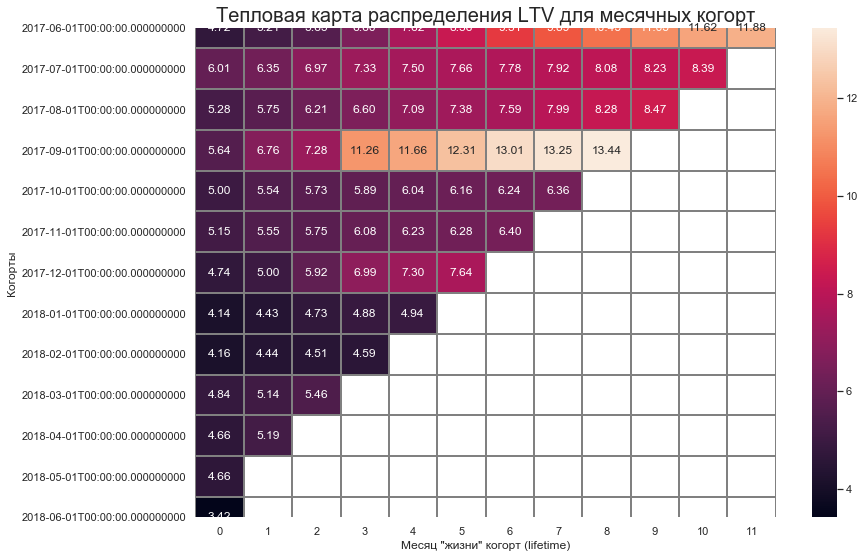

In [64]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Тепловая карта распределения LTV для месячных когорт', fontsize=20)
sns.heatmap(ltv_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.xlabel('Месяц "жизни" когорт (lifetime)')
plt.ylabel('Когорты')
plt.show()

На карте видно, что самая прибыльная когорта - сентябрь 2017 года. Так же прибыльная когорта июнь 2017, но она и прожила больше всех.

Отберём период 6 месяцев и только те когорты, которые прожили не менее 6-ти месяцев.

In [65]:
ltv_pivot = ltv_pivot.loc[:, :5]
ltv_pivot = ltv_pivot[ltv_pivot[5].notna()]
display(ltv_pivot)

cohort_lifetime,0,1,2,3,4,5
first_buy_month,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913


Составим для этих данных тепловую карту.

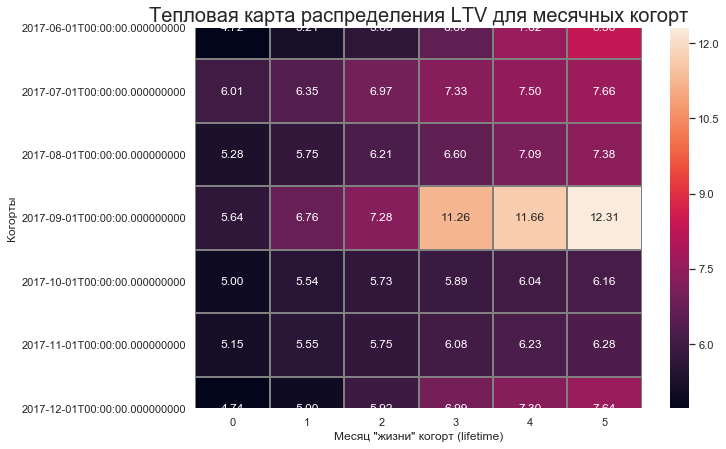

In [66]:
sns.set(style='white')
plt.figure(figsize=(10, 7))
plt.title('Тепловая карта распределения LTV для месячных когорт', fontsize=20)
sns.heatmap(ltv_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.xlabel('Месяц "жизни" когорт (lifetime)')
plt.ylabel('Когорты')
plt.show()

Среди когорт проживших полгода, самая прибыльная - сентябрь 2017, затем июнь 2017. Менее всего принесли октябрьская и ноябрьская когорты. Думаю, это вызвано похолоданием - люди стали сидеть дома.

Поскольку заявленная маржинальность сервиса 100%, узнаем средний **ltv** за 6 месяцев для всех когорт по данным таблицы.

In [67]:
print('Средний LTV по когортам за 6 месяцев {:.3f}'.format(ltv_pivot[5].mean()))

Средний LTV по когортам за 6 месяцев 7.969


### 2.3. Маркетинговые метрики<a name="2.3.">
[<font size="2">(к содержанию)</font>](#to_content.)

Ещё раз ознакомимся с таблицей затрат.

In [68]:
display(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


Посчитаем общие затраты.

In [69]:
total_marketing_costs = costs['costs'].sum()
print(total_marketing_costs)

329131.62


Составим сводную таблицу расходов по рекламным источникам и отсортируем по убыванию.

In [70]:
marketing_costs = costs.groupby('source_id', as_index=False).agg({'costs':'sum'})
display(marketing_costs.sort_values('costs', ascending=False))

,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


Посмотрим на те же данные в разрезе месяцев по каждому источнику. Для этого добавим в начальную таблицу **`costs`** столбец с месяцем (извлечём месяц из столбца `dt`).

In [71]:
costs['month'] = costs['dt'].astype('datetime64[M]')
marketing_costs_by_time = costs.groupby(['source_id', 'month'], as_index=False).agg({'costs':'sum'})
display(marketing_costs_by_time)

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


Далее составим график расходов на разные источники по месяцам.

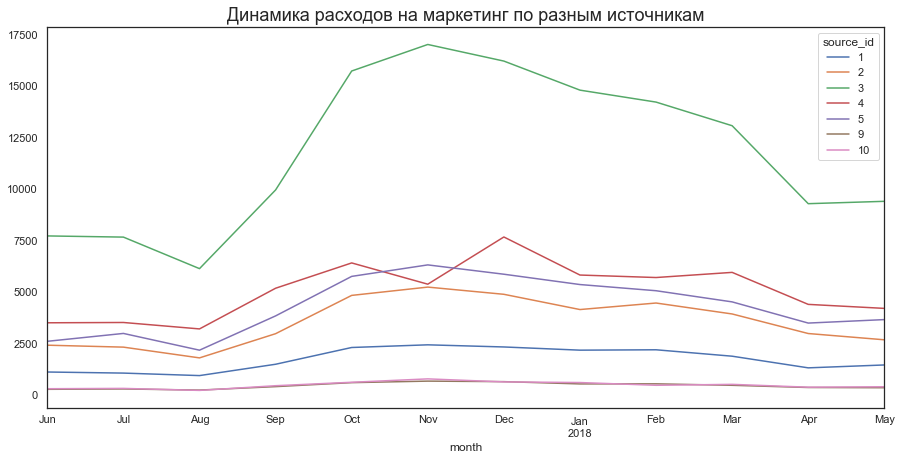

In [72]:
marketing_costs_by_time.pivot_table(columns='source_id', index='month', values='costs').plot(figsize=(15, 7))
plt.title('Динамика расходов на маркетинг по разным источникам', fontsize=18)
plt.show()

Видны источники с самыми большими вложениями - **`3`** - затраты быстро росли до ноября 2017, затем сокращались.  
Далее с большим отрывом идут **`4`**, **`5`** и **`2`** - примерно на одном уровне. Чуть ниже **`1`**, а затраты на **`9`** и **`10`** недалеки от нуля.

Теперь сгруппируем данные таблицы **visits** по рекламным источникам и посчитаем количество уникальных пользователей для каждого из них. Затем объединим таблицу с **marketing_costs** по полю `source_id`, и добавим новый столбец с показателем **CAC**, разделив затраты на количество привлечённых пользователей. Получим средний **CAC** для каждого источника траффика.

Отсортируем талицу визитов по времени начала сессий по возрастанию, затем сгруппируем по **uid** и найдём первый источник траффика для каждого пользователя. Так мы узнаем "кто откуда пришёл" изначально.

In [73]:
visits2 = visits.sort_values(['start_ts'], ascending=True)
source_uids = visits2.groupby('uid', as_index=False).agg({'source_id':'first'})
display(source_uids)

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
...,...,...
228164,18446403737806311543,5
228165,18446424184725333426,4
228166,18446556406699109058,3
228167,18446621818809592527,4


Затем объединим эту таблицу с таблицей заказов, чтобы знать источник уже конкретных покупателей, а не просто посетителей.

In [74]:
orders2 = orders.merge(source_uids, on='uid')
display(orders2)

,buy_ts,revenue,uid,buy_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,3


Сгруппируем получившуюся таблицу по `source_id` и посчитаем для каждого источника количество уникальных пользователей и сумму дохода.  
Аналогично сгруппируем затраты и посчитаем сумму расходов на каждый источник и объединим эти таблицы по `source_id`.  
Затем рассчитаем **CAC** разделив расходы на количество пользователей. Для удобства, вывод отсортируем по убыванию.

In [75]:
source_numbers = orders2.groupby('source_id', as_index=False).agg({'uid':'nunique', 'revenue':'sum'})
costs2 = costs.groupby('source_id', as_index=False).agg({'costs':'sum'})
source_numbers = source_numbers.merge(costs2, on='source_id', how='outer')
source_numbers.rename(columns={'uid':'users'}, inplace=True)
source_numbers['cac'] = source_numbers['costs'] / source_numbers['users']
display(source_numbers.sort_values('cac', ascending=False))

,source_id,users,revenue,costs,cac
2,3,10473,54511.24,141321.63,13.493901
1,2,3506,46923.61,42806.04,12.209367
4,5,6931,52624.02,51757.10,7.467479
0,1,2899,31090.55,20833.27,7.186364
3,4,10296,56696.83,61073.60,5.931779
6,9,1088,5759.40,5517.49,5.071222
7,10,1329,4450.33,5822.49,4.381106
5,7,1,1.22,NaN,NaN


Мы видим, что дороже всего нам достаются клиенты из источников **`3`** и **`2`**, самые же "дешёвые" из **`7`** и **`6`**.

Теперь рассчитаем **CAC** по всему проекту в целом. Возьмём  общую сумму расходов на маркетинг, разделим на количество всех уникальных пользователей совершивших покупку на сайте.

In [76]:
total_cac = total_marketing_costs / orders['uid'].nunique()
print('Средний CAC на одного покупателя для всего проекта равен {:.4f}'.format(total_cac))

Средний CAC на одного покупателя для всего проекта равен 9.0116


Отразим динамику изменения **CAC** в течение времени. Сгруппируем заказы по месяцам и рекламным источникам, посчитав количество уникальных пользователей. объединим с таблицей затрат и сведём таблицу, затем добавим в неё **CAC**.

In [77]:
cac_per_month = orders2.groupby(['source_id', 'buy_month'], as_index=False).agg({'uid':'nunique'})
cac_per_month.rename(columns={'buy_month':'month'}, inplace=True)
cac_per_month = costs.merge(cac_per_month, on=['source_id', 'month'])
cac_per_month = cac_per_month.pivot_table(index=['source_id', 'month'],
                                          values=['costs', 'uid'], 
                                          aggfunc={'costs':'sum', 'uid':'first'}).reset_index()
cac_per_month['cac'] = cac_per_month['costs'] / cac_per_month['uid']
display(cac_per_month)

,source_id,month,costs,uid,cac
0,1,2017-06-01,1125.61,190,5.924263
1,1,2017-07-01,1072.88,176,6.095909
2,1,2017-08-01,951.81,128,7.436016
3,1,2017-09-01,1502.01,255,5.890235
4,1,2017-10-01,2315.75,376,6.158910
...,...,...,...,...,...
79,10,2018-01-01,614.35,98,6.268878
80,10,2018-02-01,480.88,134,3.588657
81,10,2018-03-01,526.41,199,2.645276
82,10,2018-04-01,388.25,118,3.290254


Для лучшей наглядности составим график.

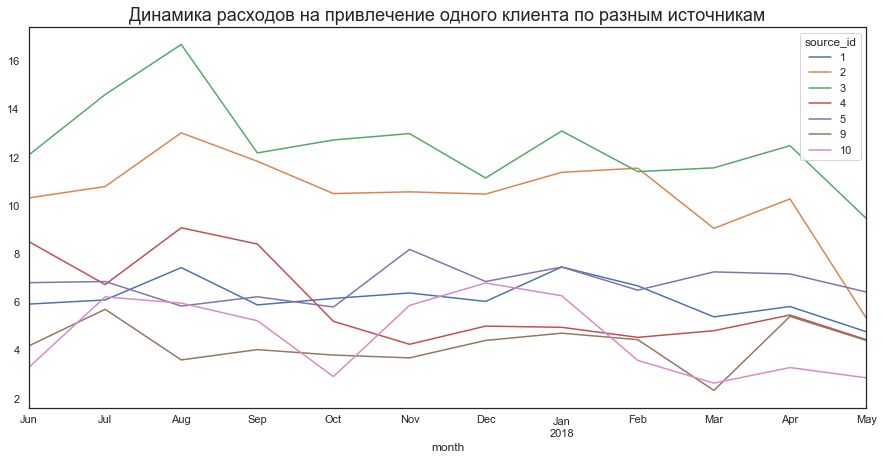

In [78]:
cac_per_month.pivot_table(index='month', columns='source_id', values='cac').plot(figsize=(15, 7))
plt.title('Динамика расходов на привлечение одного клиента по разным источникам', fontsize=18)
plt.show()

График получился похож на общую динамику расходов на маркетинг по разным источникам: самый дорогой канал привлечения **`3`**. На него тратилось больше всего денег, но клиентов из него не стало настолько много, чтобы это окупить.  Они просто стали клиентами, привлечение которых обошлось очень дорого. Второй по стоимости канал привлечения - **`2`**.

Добавим в таблицу новые столбцы, чтобы увидеть общие показатели в разрезе источников, и выведем таблицу на экран.

In [79]:
source_numbers['ltv'] = source_numbers['revenue'] / source_numbers['users']
source_numbers['romi'] = source_numbers['ltv'] / source_numbers['cac']
display(source_numbers.sort_values('romi', ascending=False))

,source_id,users,revenue,costs,cac,ltv,romi
0,1,2899,31090.55,20833.27,7.186364,10.724577,1.492351
1,2,3506,46923.61,42806.04,12.209367,13.383802,1.096191
6,9,1088,5759.40,5517.49,5.071222,5.293566,1.043844
4,5,6931,52624.02,51757.10,7.467479,7.592558,1.016750
3,4,10296,56696.83,61073.60,5.931779,5.506685,0.928336
7,10,1329,4450.33,5822.49,4.381106,3.348631,0.764335
2,3,10473,54511.24,141321.63,13.493901,5.204931,0.385725
5,7,1,1.22,NaN,NaN,1.220000,NaN


Видим, что лучше всего окупаются клиенты из источника **`1`**. Так же окупаются вложения в привлечение по каналам **`2`**, **`9`** и **`5`**. Каналы **`3`**, **`7`** и **`2`** затратны, и расходы на привлечение клиента превышают получаемую выручку.

Однако, нам нужны данные **по когортам**.

Взглянем на дополненную таблицу заказов ещё раз.

In [80]:
display(orders2)

,buy_ts,revenue,uid,buy_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,3


Составим когорты по месяцу первой покупки. Для этого сгруппируем пользователей по **`uid`**,  и найдём минимальную дату (месяц) покупки, затем объединим таблицы. 

In [81]:
ord_coh = orders2.groupby('uid', as_index=False).agg({'buy_month':'min'})
ord_coh.rename(columns={'buy_month':'first_month'}, inplace=True)
ord_coh = orders2.merge(ord_coh, on='uid')
display(ord_coh)

,buy_ts,revenue,uid,buy_month,source_id,first_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,4,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,10,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,3,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,3,2018-05-01


Теперь узнаем количество пользователей в каждой когорте. Для этого сгруппируем данные по первому месяцу покупки и посчитаем количество униальных пользователей. Затем объединим таблицы и разделим доход на количество пользователей в когорте, получим **LTV**.

In [82]:
ord_coh2 = ord_coh.groupby('first_month', as_index=False).agg({'uid':'nunique'})
ord_coh2.rename(columns={'uid':'users_in_cohort'}, inplace=True)
ord_coh = ord_coh.merge(ord_coh2, on='first_month')
ord_coh['ltv'] = ord_coh['revenue'] / ord_coh['users_in_cohort']

Добавим в таблицу **lifetime**. Отнимем от месяца покупки месяц первой покупки, округлим и узнаем сколько месяцев "жизни" когорты прошло.

In [83]:
ord_coh['lifetime'] = (ord_coh['buy_month'] - ord_coh['first_month']) / np.timedelta64(1, 'M')
ord_coh['lifetime'] = ord_coh['lifetime'].round().astype('int64')
display(ord_coh)

,buy_ts,revenue,uid,buy_month,source_id,first_month,users_in_cohort,ltv,lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,2017-06-01,2023,0.008403,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,2017-06-01,2023,0.000272,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2,2017-06-01,2023,0.000183,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2,2017-06-01,2023,0.000272,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,2017-06-01,2023,0.000183,0
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,4,2018-05-01,2988,0.001553,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,10,2018-05-01,2988,0.001941,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,3,2018-05-01,2988,0.000100,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,3,2018-05-01,2988,0.001228,0


Удалим лишние данные из таблицы **`cac_per_month`**, переименуем столбец для удобства объединения, и смёрджим таблицы.

In [84]:
cac_per_month2 = cac_per_month.drop(columns=['cac', 'uid'])
cac_per_month2.rename(columns={'month':'first_month'}, inplace=True)
ord_coh = ord_coh.merge(cac_per_month2, on=['source_id', 'first_month'])
display(ord_coh)

,buy_ts,revenue,uid,buy_month,source_id,first_month,users_in_cohort,ltv,lifetime,costs
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,2017-06-01,2023,0.008403,0,1125.61
1,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,1,2017-06-01,2023,0.000603,0,1125.61
2,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-01,1,2017-06-01,2023,0.000420,0,1125.61
3,2017-06-02 15:08:00,12.83,3644482766749211722,2017-06-01,1,2017-06-01,2023,0.006342,0,1125.61
4,2017-06-04 13:06:00,17.11,3644482766749211722,2017-06-01,1,2017-06-01,2023,0.008458,0,1125.61
...,...,...,...,...,...,...,...,...,...,...
50408,2018-05-31 15:26:00,2.14,5832940207941651411,2018-05-01,9,2018-05-01,2988,0.000716,0,362.17
50409,2018-05-31 16:06:00,4.89,14372027836561602167,2018-05-01,9,2018-05-01,2988,0.001637,0,362.17
50410,2018-05-31 17:20:00,3.42,13465334080837783919,2018-05-01,9,2018-05-01,2988,0.001145,0,362.17
50411,2018-05-31 18:22:00,0.92,5359718846599854608,2018-05-01,9,2018-05-01,2988,0.000308,0,362.17


Разделим затраты на количество людей в когорте, получим стоимость привлечения одного клиента (**CAC**). Затем разделим **LTV** на **CAC** и получим **ROMI**.

In [85]:
ord_coh['cac'] = ord_coh['costs'] / ord_coh['users_in_cohort']
ord_coh['romi'] = ord_coh['ltv'] / ord_coh['cac']
display(ord_coh)

,buy_ts,revenue,uid,buy_month,source_id,first_month,users_in_cohort,ltv,lifetime,costs,cac,romi
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,2017-06-01,2023,0.008403,0,1125.61,0.556406,0.015103
1,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,1,2017-06-01,2023,0.000603,0,1125.61,0.556406,0.001084
2,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-01,1,2017-06-01,2023,0.000420,0,1125.61,0.556406,0.000755
3,2017-06-02 15:08:00,12.83,3644482766749211722,2017-06-01,1,2017-06-01,2023,0.006342,0,1125.61,0.556406,0.011398
4,2017-06-04 13:06:00,17.11,3644482766749211722,2017-06-01,1,2017-06-01,2023,0.008458,0,1125.61,0.556406,0.015201
...,...,...,...,...,...,...,...,...,...,...,...,...
50408,2018-05-31 15:26:00,2.14,5832940207941651411,2018-05-01,9,2018-05-01,2988,0.000716,0,362.17,0.121208,0.005909
50409,2018-05-31 16:06:00,4.89,14372027836561602167,2018-05-01,9,2018-05-01,2988,0.001637,0,362.17,0.121208,0.013502
50410,2018-05-31 17:20:00,3.42,13465334080837783919,2018-05-01,9,2018-05-01,2988,0.001145,0,362.17,0.121208,0.009443
50411,2018-05-31 18:22:00,0.92,5359718846599854608,2018-05-01,9,2018-05-01,2988,0.000308,0,362.17,0.121208,0.002540


Для наглядности составим тепловые карты по сводным таблицам для каждого источника траффика. Тут нам поможет цикл ***for***

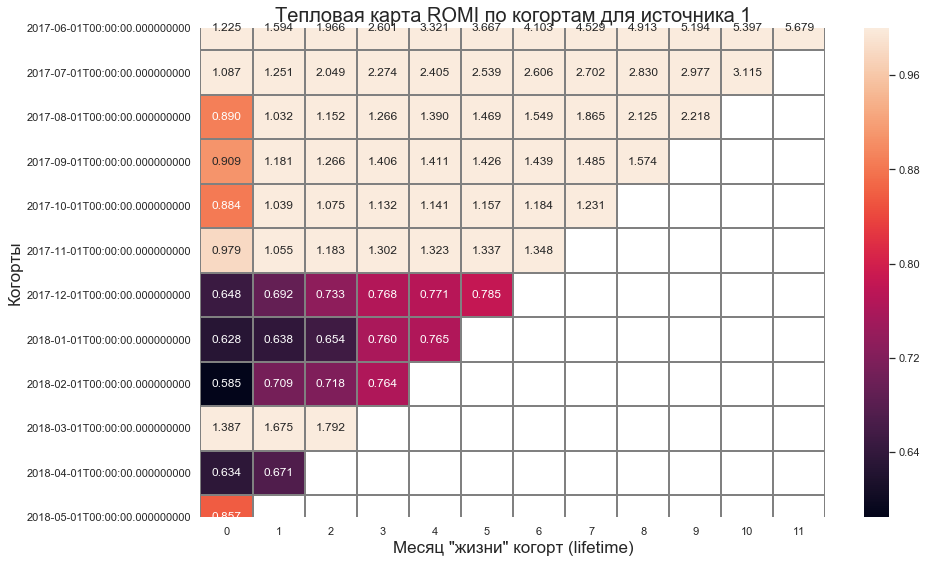

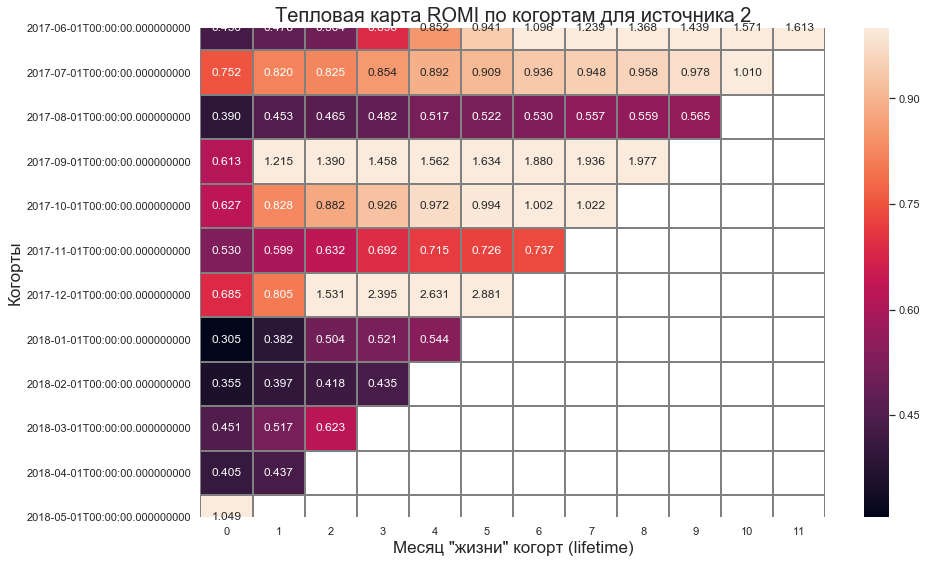

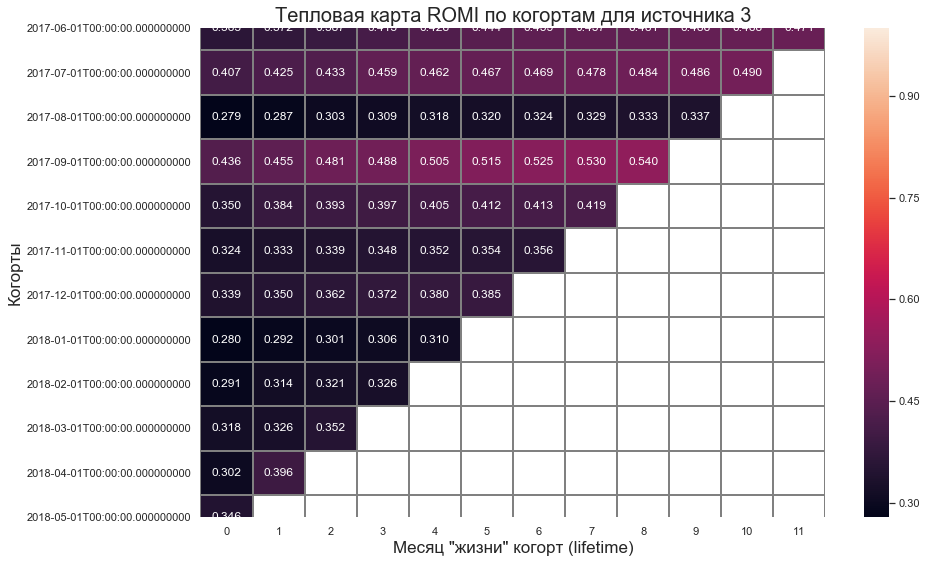

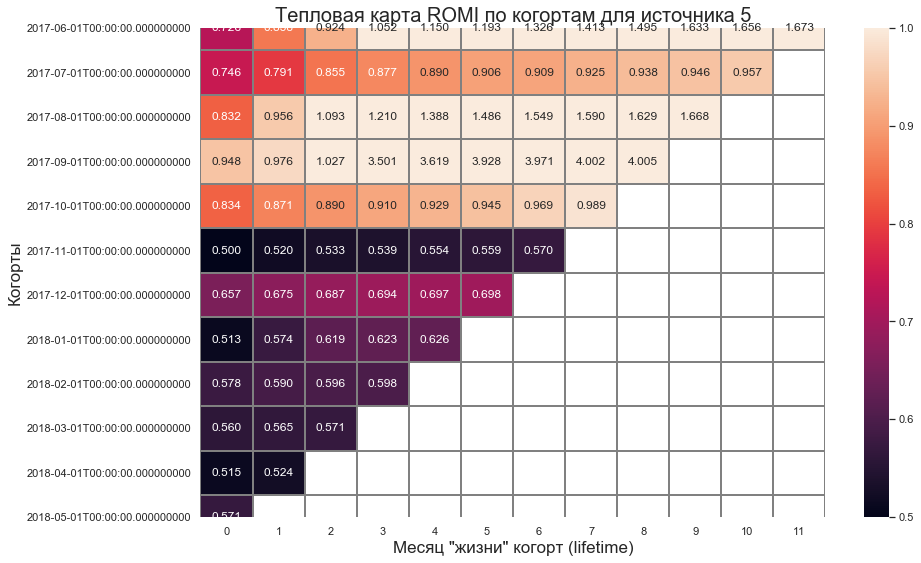

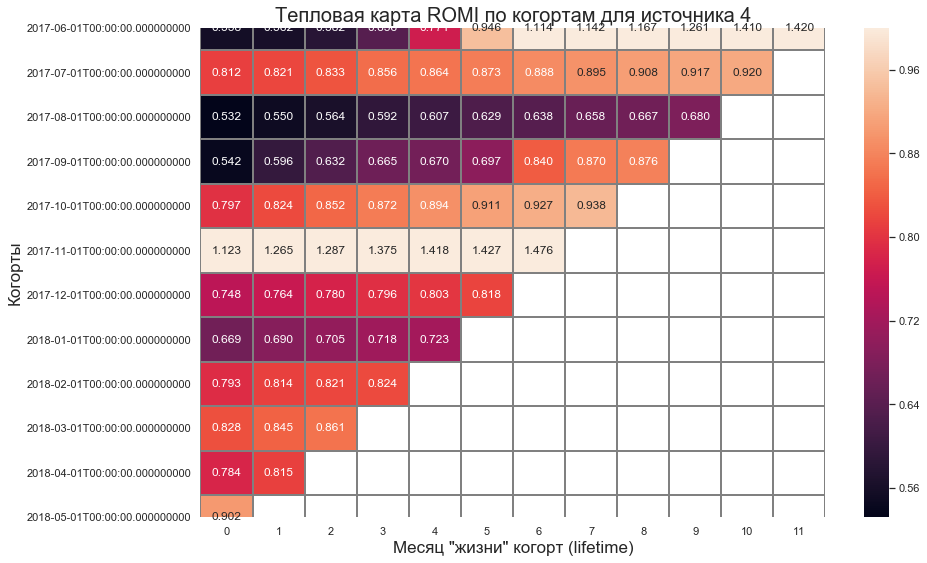

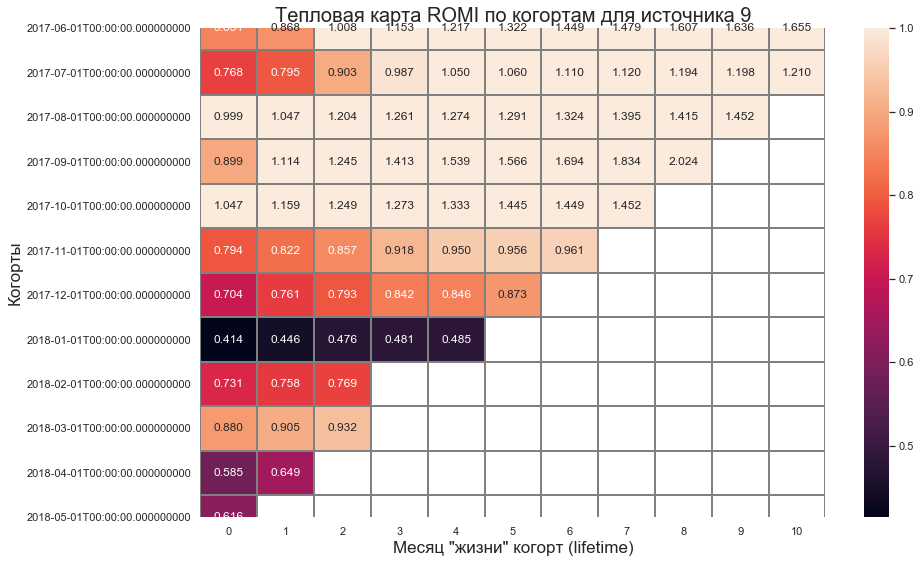

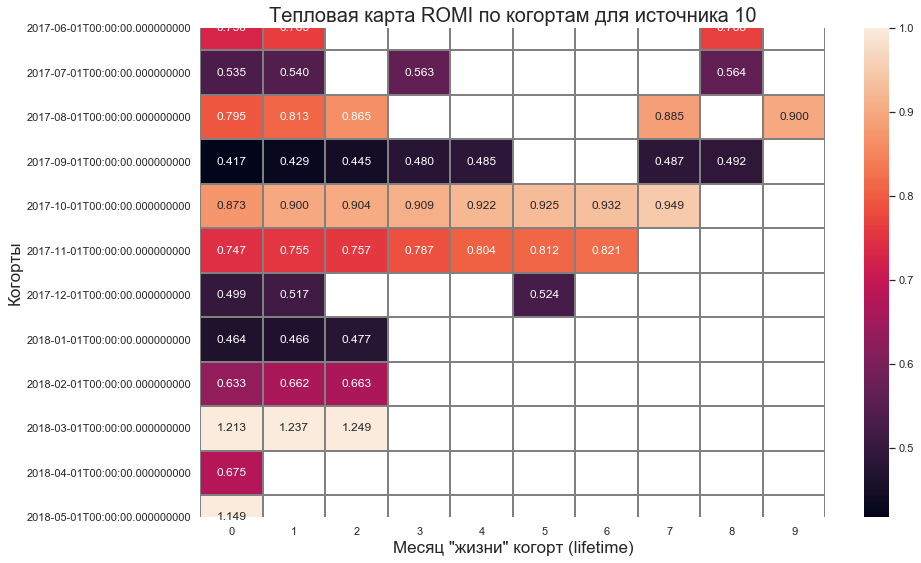

In [86]:
for i in ord_coh['source_id'].unique():
    pivot_source = ord_coh[ord_coh['source_id'] == i].pivot_table(index='first_month', 
                                                            columns='lifetime', 
                                                            values='romi',
                                                            aggfunc='sum')
    pivot_source = pivot_source.cumsum(axis=1)
    sns.set(style='white')
    plt.figure(figsize=(14, 9))
    plt.title('Тепловая карта ROMI по когортам для источника {}'.format(i), fontsize=20)
    sns.heatmap(pivot_source, annot=True, fmt='.3f', vmax=1, linewidths=1, linecolor='gray')
    plt.xlabel('Месяц "жизни" когорт (lifetime)', fontsize=17)
    plt.ylabel('Когорты', fontsize=17)
    plt.show()

По когортам в разрезе источников подтвердились общие данные - лучше всего окупаются клиенты из источников **`1`**, **`2`**, **`5`** и **`9`**.  
А среди когорт, почти во всех случаях, быстрее всего окупается сентябрьская.

Посмотрим на поведение **ROMI** для разных источников при разном времени жизни.

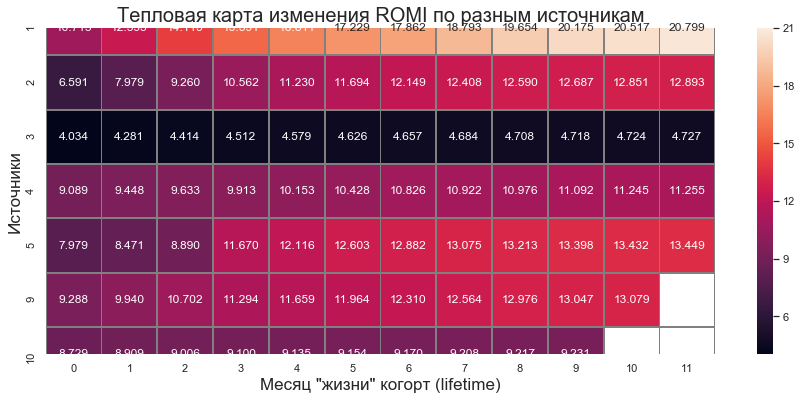

In [87]:
pivot_source2 = ord_coh.pivot_table(index='source_id', 
                                    columns='lifetime', 
                                    values='romi', 
                                    aggfunc='sum')
pivot_source2 = pivot_source2.cumsum(axis=1)
sns.set(style='white')
plt.figure(figsize=(15, 6))
plt.title('Тепловая карта изменения ROMI по разным источникам', fontsize=20)
sns.heatmap(pivot_source2, annot=True, fmt='.3f', vmax=21, linewidths=1, linecolor='gray')
plt.xlabel('Месяц "жизни" когорт (lifetime)', fontsize=17)
plt.ylabel('Источники', fontsize=17)
plt.show()

Лучше всех окупились вложения в источник **`1`**.  
**`5`**, **`9`** и **`2`** примерно на одном уровне. Хуже всех окупается источник **`3`**.

## Шаг 3. Выводы и рекомендации.<a name="3.">
[<font size="2">(к содержанию)</font>](#to_content.)

### 3.1
Источники траффика, на которые стоит делать упор маркетологам - **`1`** и **`9`**. Судя по тепловым картам значений **ROMI** они окупаются лучше и быстрее всех остальных. То есть, доходы получаемые от привлечённых таким образом пользователей быстро перекрывают затраты на их привлечение. Так же надо отказаться от источника **`3`** - он самый дорогой, но не разу не окупился. Возможно стоит так же отказаться и от **`10`**, однако в него вливалось мало средств, и, возможно, стоит их увеличить, затем сравнить динамику и принять взвешенное решение.

### 3.2
В целом, немало новых пользователей приходят каждый день (хотя, это число уменьшается), но мало кто возвращается - коэффициент удержания (**Retention Rate**) ~4 процента. Либо эти люди в принципе мало куда ходят, либо чаще покупают билеты через другие сервисы.  
Чаще сайтом пользуются те, кто уже принял решение куда-то сходить, а возможно знает на что именно - покупка совершается за минуту.  
Половина источников траффика не эффективна, а самый дорогой из них не окупается вовсе.  
Средний чек пользователей уменьшается с началом весны - предположу, что потепление после долгого сидения дома вынуждает рассматривать и другие виды досуга.  
Доход по когортам растёт относительно равномерно, без резких скачков.  
Расходы на привлечение клиентов по некоторым источникам близки к нулю, по некоторым не оправданно высоки и от них лучше отказаться. 

### 3.3
Когортный анализ показал, что лучшее время для привлечения клиентов июнь-сентябрь. Предположу, что это связано с потеплением - люди гуляют по свежему воздуху, и их прогулки можно "разбавить" походом в кино, театр или на концерт. Сентябрьская когорта, почти по всем источникам окупилась быстрее других. Возможно, из-за того, что похолодало, на улице долго не погуляешь, но люди успели войти во вкус культурных мероприятий.